# Importing libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9

# Color System of Images

In [3]:
# cv2.IMREAD_COLOR     =>  1 => Loads image as a color image
# cv2.IMREAD_GRAYSCALE =>  0 => Loads image in grayscale mode
# cv2.IMREAD_UNCHANGED => -1 => loads image as it is including alpha channel

In [4]:
# Reading image as a Color(BGR) image - 3D Image
img1 = cv2.imread("images/lena.jpg", 1)    # 1 implies color image
img1.shape

(512, 512, 3)

In [5]:
# R => Red (0-255)
# G => Green (0-255)
# B => Blue (0-255)

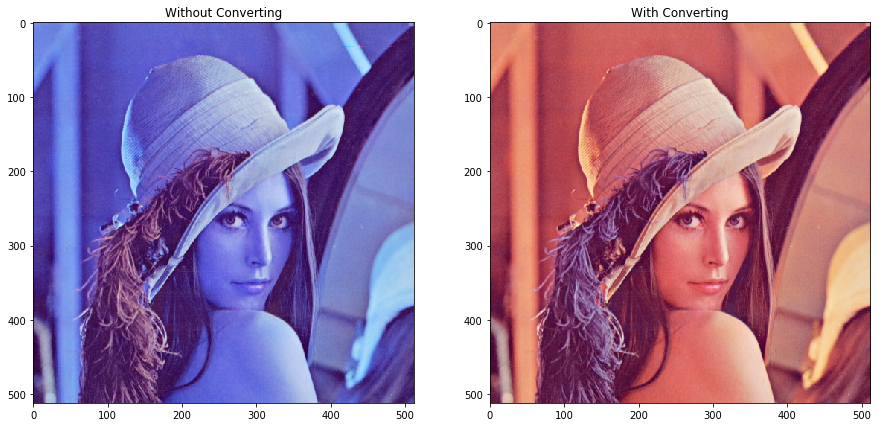

In [6]:
# Displaying image
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

titles = ['Without Converting', 'With Converting']
images = [img1, img]

for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])

plt.show()

In [7]:
# Reading image as a B&W(GrayScale) image - 2D Image
img2 = cv2.imread("images/lena.jpg", 0)    # 0 implies B&W image
img2.shape

(512, 512)

In [8]:
# B&W => Black & White (0-255)

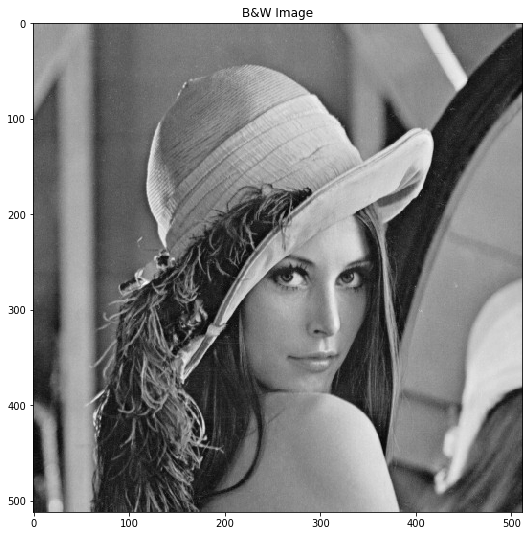

In [9]:
# Displaying image
# cv2.imwrite('B&W Image', img2)    # To save image in disk

plt.imshow(img2, 'gray')
plt.title('B&W Image')
plt.show()

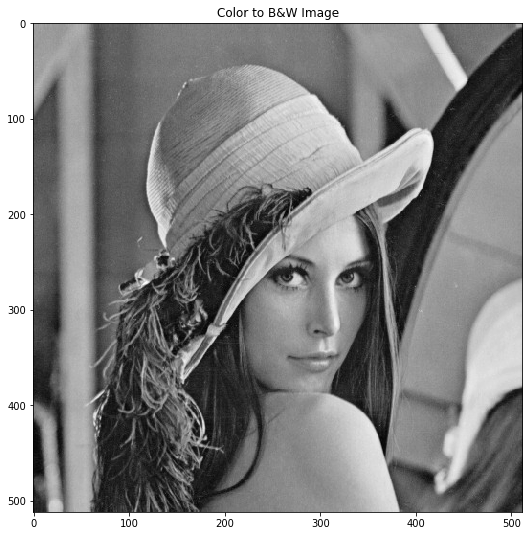

In [10]:
# Converting color image into B&W image
ctg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(ctg, 'gray')
plt.title('Color to B&W Image')
plt.show()

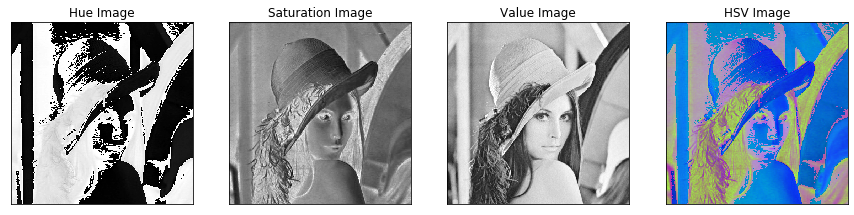

In [11]:
# Converting color image into HSV image
cth = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

titles = ['Hue Image', 'Saturation Image', 'Value Image', 'HSV Image']
images = [cth[:,:,0], cth[:,:,1], cth[:,:,2], cth]

for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()
# Results are little diff. from OpenCV (HSV Image Color is diff.)

In [12]:
# H => Hue => Color Value (0-179)
# S => Saturation => Vibrancy of color (0-255)
# V => Value => Brightness/Intensity (0-255)

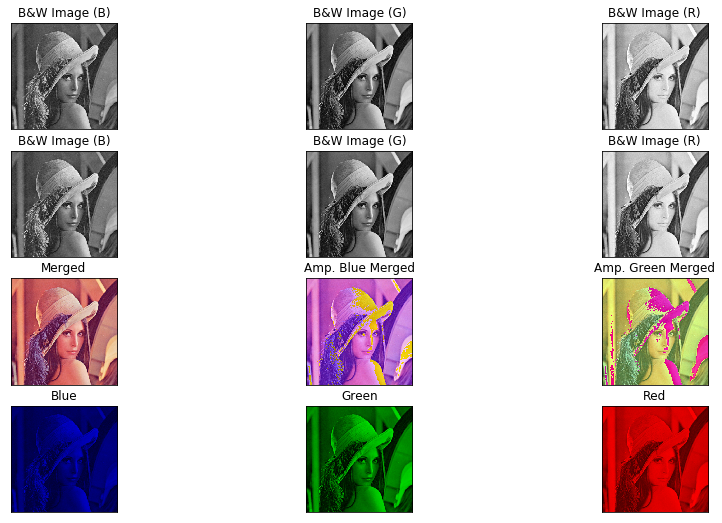

In [13]:
B, G, R = cv2.split(img1)
# This will display B&W Image as it is 2D Image

# We can even merge them to get real image
merged = cv2.merge([B, G, R])

# lets get amplified blue color image
ab_merged = cv2.merge([B+100, G, R])
ag_merged = cv2.merge([B, G+100, R])

# Above whole idea can also be achieved with real colors as-
B, G, R = cv2.split(img1)
zeros = np.zeros(img1.shape[:2], dtype="uint8")
RB = cv2.merge([B, zeros, zeros])    # correspondes to Blue
RG = cv2.merge([zeros, G, zeros])    # correspondes to Green
RR = cv2.merge([zeros, zeros, R])    # correspondes to Red

titles = ['B&W Image (B)', 'B&W Image (G)', 'B&W Image (R)', 'B&W Image (B)', 'B&W Image (G)', 'B&W Image (R)', 'Merged', 'Amp. Blue Merged', 'Amp. Green Merged', 'Blue', 'Green', 'Red']
images = [img1[:,:,0], img1[:,:,1], img1[:,:,2], B, G, R, merged, ab_merged, ag_merged, RB, RG, RR]

for i in range(len(images)):
    plt.subplot(4, 3, i+1)
    if i<6:
        plt.imshow(images[i], 'gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

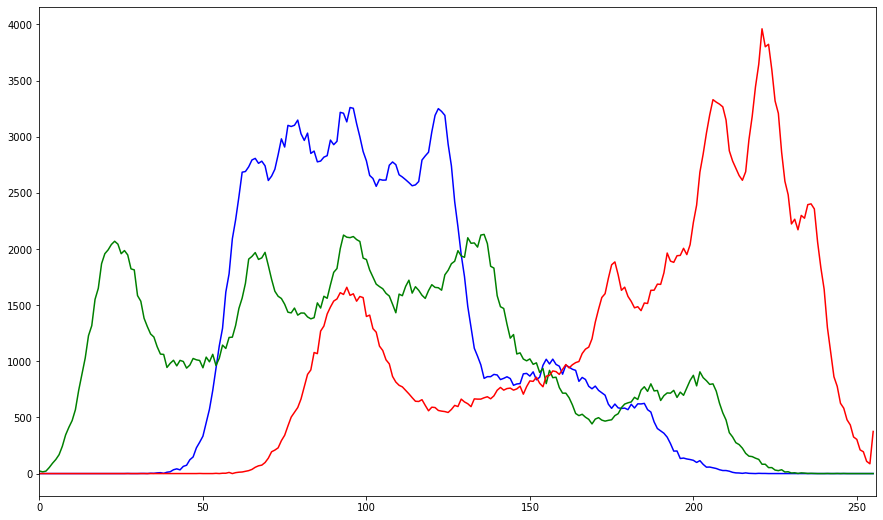

In [14]:
# Drawing histograms
color = ['b', 'g', 'r']
for i, col in enumerate(color):
    histogram = cv2.calcHist([img1], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col)
    plt.xlim([0, 256])

# Drawing images & shapes

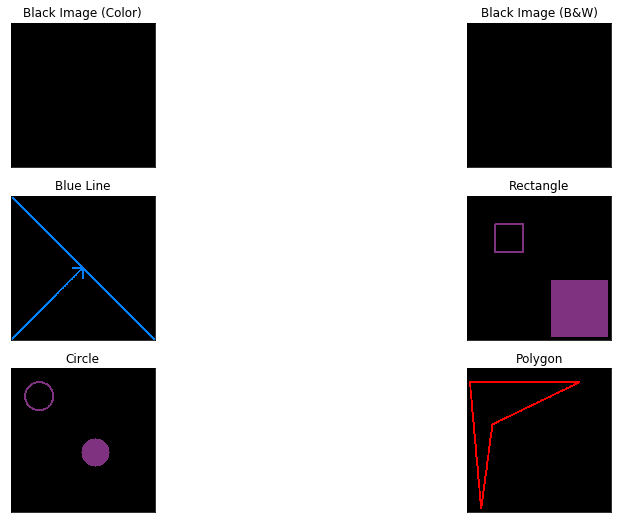

In [15]:
# Creating a black image
bimg1 = np.zeros((512, 512, 3), np.uint8)
bimg2 = np.zeros((512, 512), np.uint8)

# Draw a diagonal blue (255, 127, 0) line of thickness equal to 5 pixels
limg = np.zeros((512, 512, 3), np.uint8)
# line(image, start, end, color, thickness)
cv2.line(limg, (0, 0), (511, 511), (255, 127, 0), 5)
cv2.arrowedLine(limg, (0, 511), (255, 255), (255, 127, 0), 5)    # Arrowed Line

# Drawing a rectangle
rimg = np.zeros((512, 512, 3), np.uint8)
# rectangle(image, start, diag. opp. end, color, thickness)
cv2.rectangle(rimg, (100, 100), (200, 200), (127, 50, 127), 5)    # 5 => border thickness
cv2.rectangle(rimg, (300, 300), (500, 500), (127, 50, 127), -1)   # -1 => fill inside

# Drawing a circle
cimg = np.zeros((512, 512, 3), np.uint8)
# circle(image, center, radius, color, thickness)
cv2.circle(cimg, (100, 100), 50, (127, 50, 127), 5)    # 5 => border thickness
cv2.circle(cimg, (300, 300), 50, (127, 50, 127), -1)   # -1 => fill inside

# Drawing a polygon
pimg = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[10, 50], [400, 50], [90, 200], [50, 500]], np.int32).reshape((-1, 1, 2))
cv2.polylines(pimg, [pts], True, (0, 0, 255), 5)    # True refers 'closed figure'

titles = ['Black Image (Color)', 'Black Image (B&W)', 'Blue Line', 'Rectangle', 'Circle', 'Polygon']
images = [bimg1, bimg2, limg, rimg, cimg, pimg]

for i in range(len(images)):
    plt.subplot(3, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Drawing text

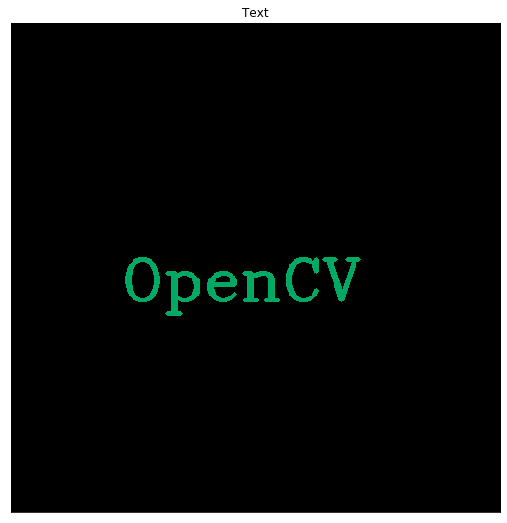

In [16]:
timg = np.zeros((512, 512, 3), np.uint8)
# putText(image, text, bottom left start pt, font, font-size, color, thickness)
cv2.putText(timg, 'OpenCV', (115, 290), cv2.FONT_HERSHEY_COMPLEX, 2, (100, 170, 0), 3)
plt.imshow(cv2.cvtColor(timg, cv2.COLOR_BGR2RGB))
plt.title("Text")
plt.xticks([])
plt.yticks([])
plt.show()

# Affine Transformations

In [17]:
# Affine Transformations
# It includes scaling, rotation, translation.

# Non-Affine/Projective/Homography Transformations
# It does not preserve parallelism, length & angle.
# It does however preserve collinearity & incidence.

## Image Translations

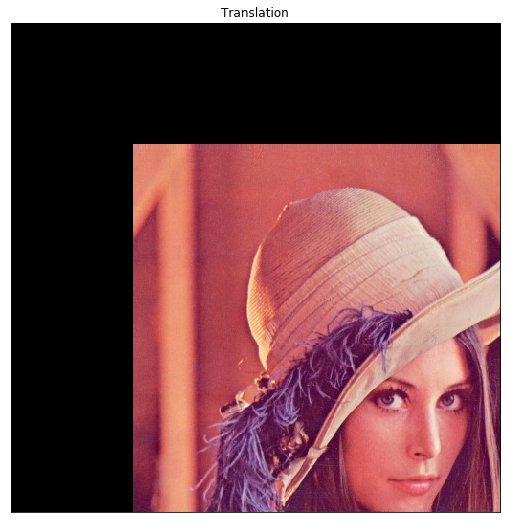

[[  1.   0. 128.]
 [  0.   1. 128.]]


In [18]:
img1 = cv2.imread('images/lena.jpg', 1)

# Store height and width of the image
height, width = img1.shape[:2]
quarter_height, quarter_width = height/4, width/4

#       | 1 0 Tx |    # Tx represents the shift along the x-axis
#  T  = | 0 1 Ty |    # Ty represents the shift along the y-axis

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(img1, T, (width, height))
plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
plt.title("Translation")
plt.xticks([])
plt.yticks([])
plt.show()

print(T)

## Rotating the image

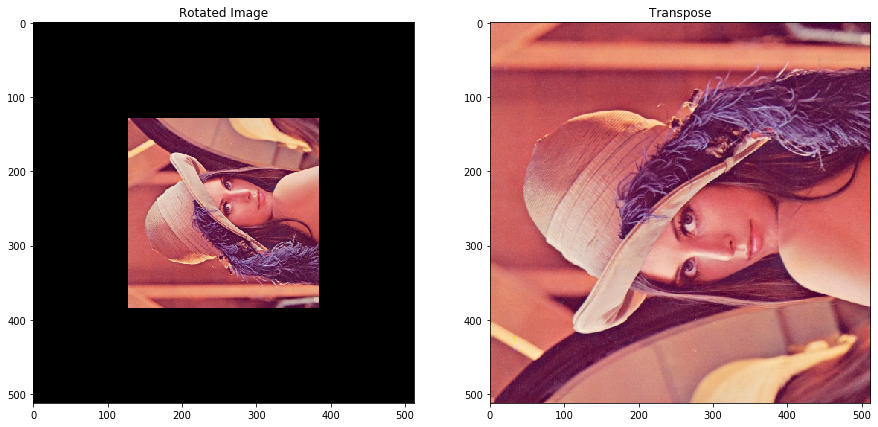

In [19]:
img1 = cv2.imread('images/lena.jpg', 1)

# Store height and width of the image
height, width = img1.shape[:2]

# Divide by two to rototate the image around its centre
M = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)
# getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)

#     | cos0 -sin0 |
# M = | sin0  cos0 | where 0 is the angle of rotation

# M is our rotation matrix
rotated_image1 = cv2.warpAffine(img1, M, (width, height))
# Contains black space around the image

# Using transpose
rotated_image2 = cv2.transpose(img1)

titles = ['Rotated Image', 'Transpose']
images = [rotated_image1, rotated_image2]

for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])

plt.show()

## Using horizontal flip

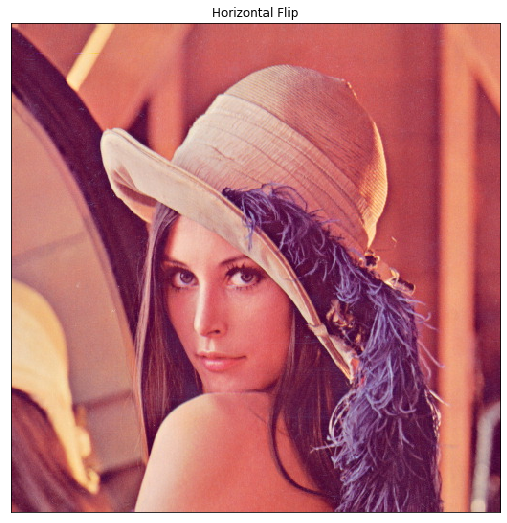

In [20]:
flipped = cv2.flip(img1, 1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.title("Horizontal Flip")
plt.xticks([])
plt.yticks([])
plt.show()

# Resizing/Scaling Images

## Interpolation

In [21]:
# Interpolation is a method of constructing new data pts. within the range of a discrete set of known data pts.

# cv2.INTER_AREA     => Good for shrinking or down sampling
# cv2.INTER_NEAREST  => Fastest
# cv2.INTER_LINEAR   => Good for zooming or up sampling (Default)
# cv2.INTER_CUBIC    => Better
# cv2.INTER_LANCZOS4 => Best

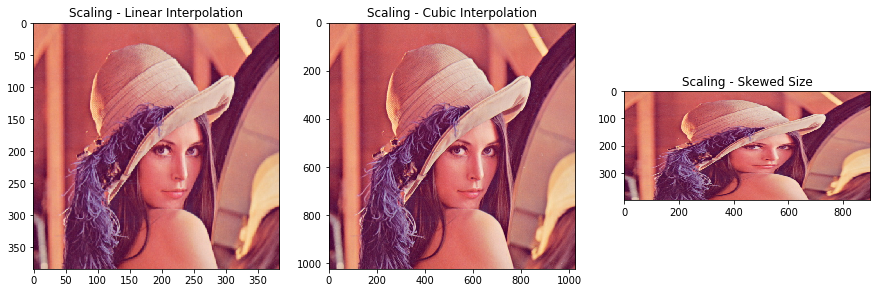

In [22]:
img1 = cv2.imread('images/lena.jpg', 1)

# Let's make our image 3/4 of it's original size
img_scaled1 = cv2.resize(img1, None, fx=0.75, fy=0.75)    # 75%

# Let's double the size of our image
img_scaled2 = cv2.resize(img1, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)    # 200%

# Let's skew the re-sizing by setting exact dimensions
img_scaled3 = cv2.resize(img1, (900, 400), interpolation = cv2.INTER_AREA)

titles = ['Scaling - Linear Interpolation', 'Scaling - Cubic Interpolation', 'Scaling - Skewed Size']
images = [img_scaled1, img_scaled2, img_scaled3]

for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])

plt.show()

## Image Pyramids

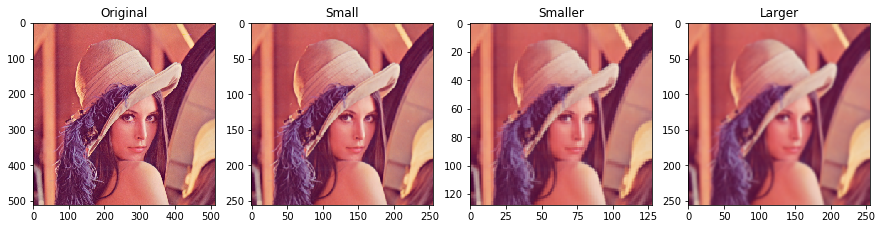

In [23]:
img1 = cv2.imread('images/lena.jpg', 1)

small = cv2.pyrDown(img1)
smaller = cv2.pyrDown(small)
larger = cv2.pyrUp(smaller)    # Will result into small in this case

titles = ['Original', 'Small', 'Smaller', 'Larger']
images = [img1, small, smaller, larger]

for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])

plt.show()
# Small & Larger are same images but larger has degraded image quality

# Image Blending

(512, 512, 3)
(512, 512, 3)


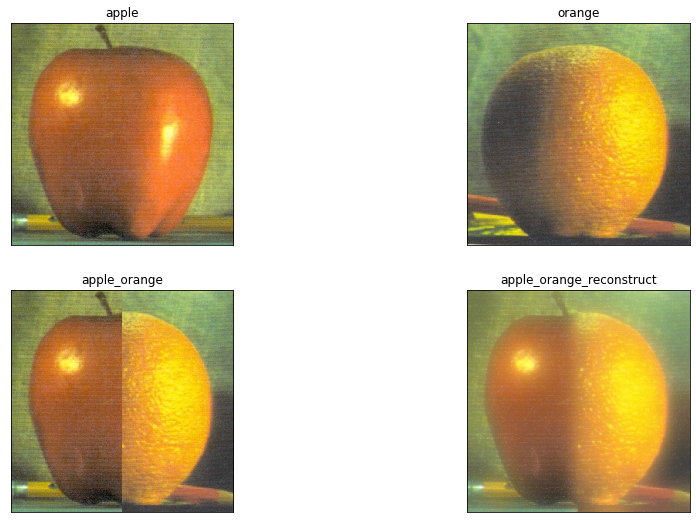

In [24]:
apple = cv2.imread('images/apple.jpg')
orange = cv2.imread('images/orange.jpg')
print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:, 256:]))

# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)


# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

titles = ['apple', 'orange', 'apple_orange', 'apple_orange_reconstruct']
images = [apple, orange, apple_orange, apple_orange_reconstruct]

for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Cropping the image

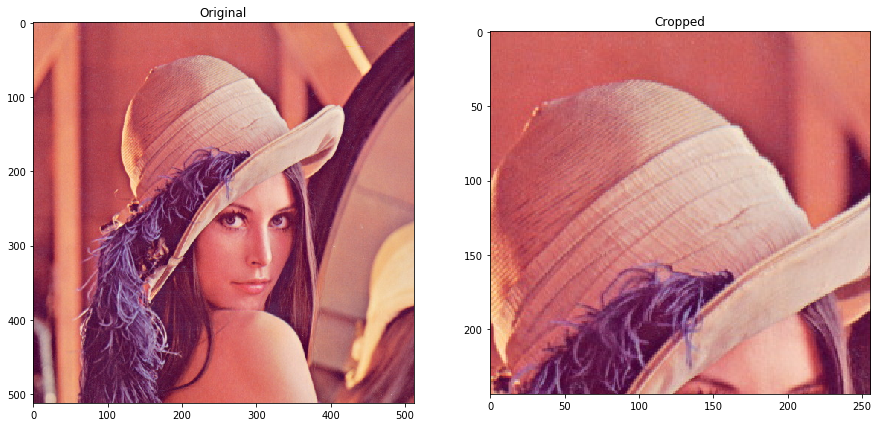

In [25]:
img1 = cv2.imread('images/lena.jpg', 1)

# Store height and width of the image
height, width = img1.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .025), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .5), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = img1[start_row:end_row , start_col:end_col]

titles = ['Original', 'Cropped']
images = [img1, cropped]

for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])

plt.show()

# Arithmetic Operations (Increase/Decrease Brightness)

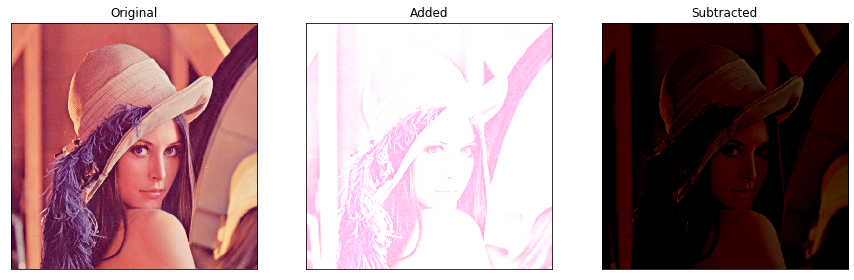

In [26]:
img1 = cv2.imread('images/lena.jpg', 1)

# Create a matrix of ones, then multiply it by a scaler of 100 
M = np.ones(img1.shape, dtype = "uint8") * 175 

# Adding matrix to image result in increasing the brightness
added = cv2.add(img1, M)    # Max-limit => 255

# Subtracting matrix to image result in decreasing the brightness
subtracted = cv2.subtract(img1, M)    # Min-limit => 0

titles = ['Original', 'Added', 'Subtracted']
images = [img1, added, subtracted]

for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Bitwise Operations & Masking

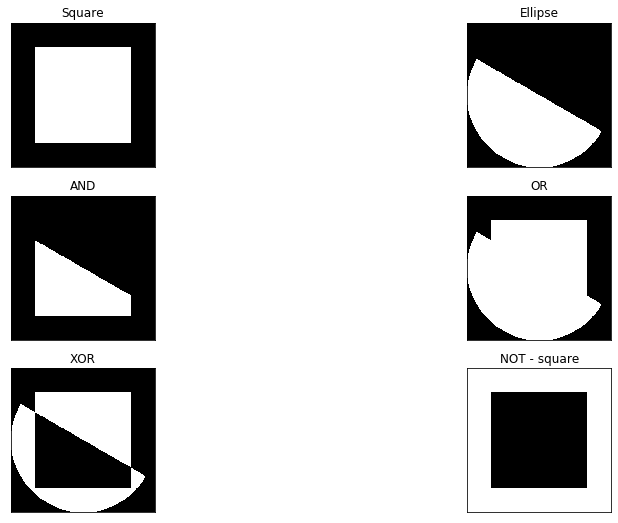

In [27]:
# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

# Shows only where they intersect
bitwiseAnd = cv2.bitwise_and(square, ellipse)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)

titles = ['Square', 'Ellipse', 'AND', 'OR', 'XOR', 'NOT - square']
images = [square, ellipse, bitwiseAnd, bitwiseOr, bitwiseXor, bitwiseNot_sq]

for i in range(len(images)):
    plt.subplot(3, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Convolution & Blurring

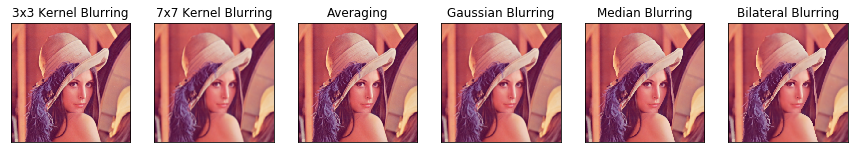

In [28]:
img1 = cv2.imread('images/lena.jpg', 1)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9
# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred1 = cv2.filter2D(img1, -1, kernel_3x3)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49
blurred2 = cv2.filter2D(img1, -1, kernel_7x7)

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
blur = cv2.blur(img1, (3, 3))

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(img1, (7, 7), 0)

# Takes median of all the pixels under kernel area and central element is replaced with this median value
median = cv2.medianBlur(img1, 5)    # 5 => ksize (odd & >1)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(img1, 9, 75, 75)

titles = ['3x3 Kernel Blurring', '7x7 Kernel Blurring', 'Averaging', 'Gaussian Blurring', 'Median Blurring', 'Bilateral Blurring']
images = [blurred1, blurred2, blur, Gaussian, median, bilateral]

for i in range(len(images)):
    plt.subplot(1, 6, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()
# Diff. can be observed in OpenCV

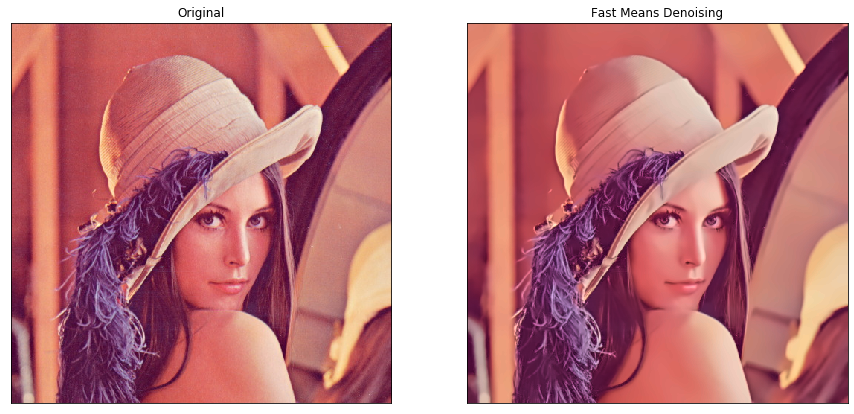

In [29]:
# Image De-noising - Non-Local Means Denoising
img1 = cv2.imread('images/lena.jpg', 1)

# cv2.fastNlMeansDenoising()             - works with a single grayscale images
# cv2.fastNlMeansDenoisingColored()      - works with a color image.
# cv2.fastNlMeansDenoisingMulti()        - works with image sequence captured in short period of time (grayscale images)
# cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images

dst = cv2.fastNlMeansDenoisingColored(img1, None, 6, 6, 7, 21)

titles = ['Original', 'Fast Means Denoising']
images = [img1, dst]

for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Sharpening the image

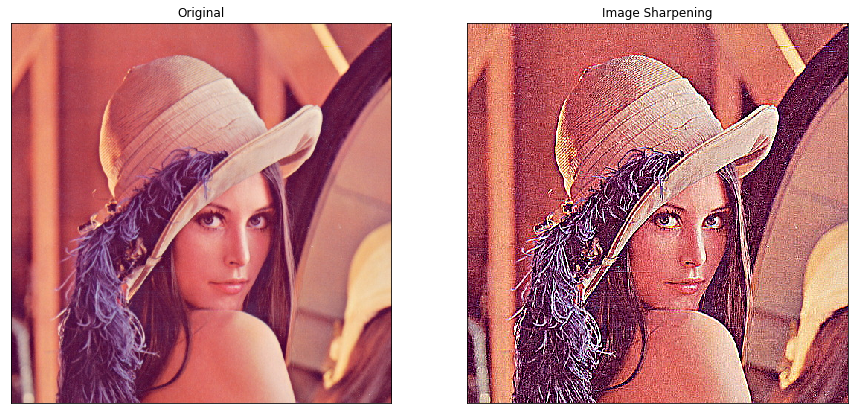

In [30]:
img1 = cv2.imread('images/lena.jpg', 1)

# Create our shapening kernel, we don't normalize since the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(img1, -1, kernel_sharpening)

titles = ['Original', 'Image Sharpening']
images = [img1, sharpened]

for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Thresholding

## Thresholding/Binarization

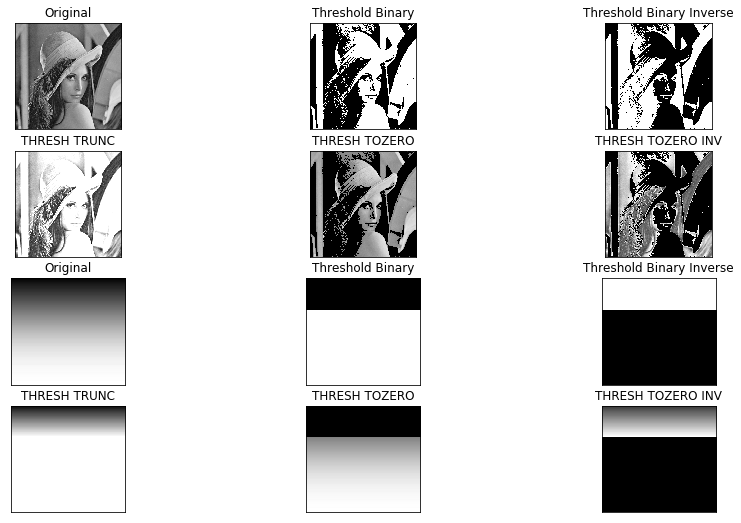

In [31]:
img2 = cv2.imread('images/lena.jpg', 0)
img2s = cv2.imread('images/gradient.jpg', 0)
# threshold(image, thresh, max_value, type)    # thresh => threshold value

# Values below 127 goes to 0, everything above goes to 255
ret,thresh1 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
ret,thresh1s = cv2.threshold(img2s, 127, 255, cv2.THRESH_BINARY)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh2s = cv2.threshold(img2s, 127, 255, cv2.THRESH_BINARY_INV)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(img2, 127, 255, cv2.THRESH_TRUNC)
ret,thresh3s = cv2.threshold(img2s, 127, 255, cv2.THRESH_TRUNC)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(img2, 127, 255, cv2.THRESH_TOZERO)
ret,thresh4s = cv2.threshold(img2s, 127, 255, cv2.THRESH_TOZERO)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(img2, 127, 255, cv2.THRESH_TOZERO_INV)
ret,thresh5s = cv2.threshold(img2s, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Threshold Binary', 'Threshold Binary Inverse', 'THRESH TRUNC', 'THRESH TOZERO', 'THRESH TOZERO INV']
images = [img2, thresh1, thresh2, thresh3, thresh4, thresh5, img2s, thresh1s, thresh2s, thresh3s, thresh4s, thresh5s]

n = len(titles)
for i in range(len(images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i%n])
    plt.xticks([])
    plt.yticks([])

plt.show()

## Adaptive Thresholding/Binarization

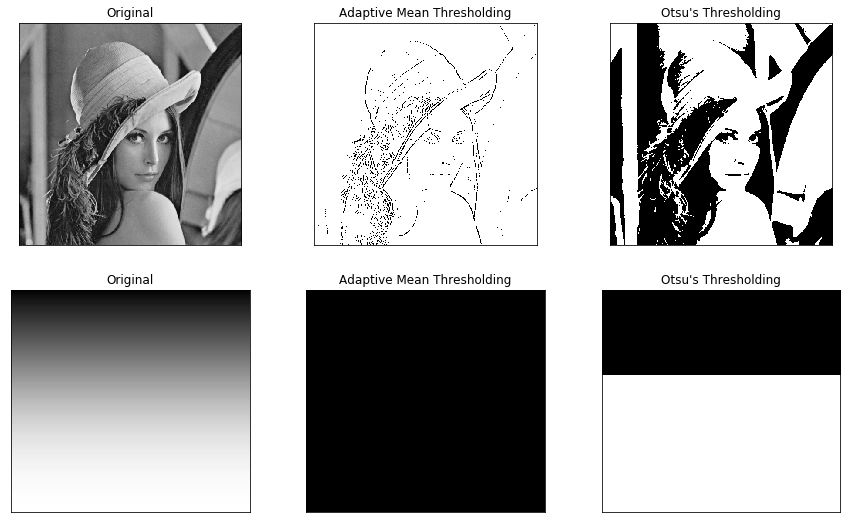

In [32]:
img2 = cv2.imread('images/lena.jpg', 0)
img2s = cv2.imread('images/gradient.jpg', 0)

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(img2, (3, 3), 0)
images = cv2.GaussianBlur(img2s, (3, 3), 0)

# Using adaptiveThreshold
th1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
th1s = cv2.adaptiveThreshold(images, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 

# Otsu's thresholding 
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, th2s = cv2.threshold(images, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original', 'Adaptive Mean Thresholding', "Otsu's Thresholding"]
images = [img2, th1, th2, img2s, th1s, th2s]

n = len(titles)
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i%n])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Morphological Transformations

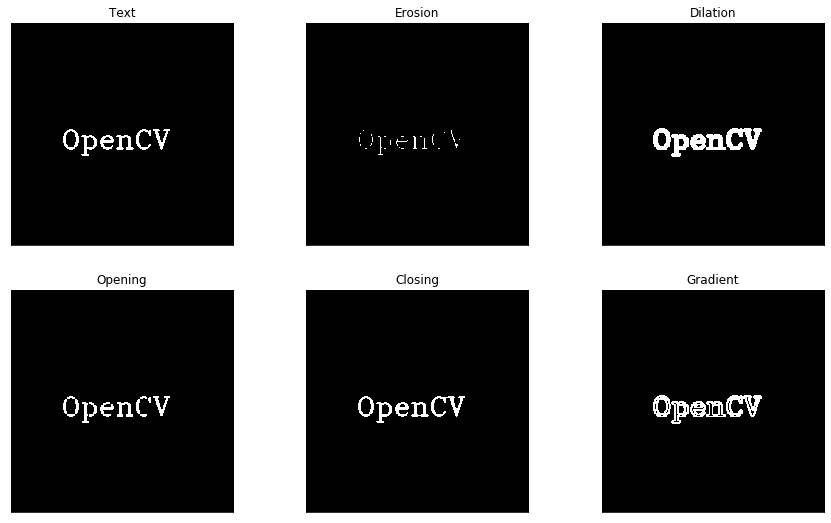

In [33]:
# Drawing text
timg = np.zeros((512, 512), np.uint8)
# putText(image, text, bottom left start pt, font, font-size, color, thickness)
cv2.putText(timg, 'OpenCV', (115, 290), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)
# Note - White is considered as the object

# Erosion - Removes pixels at the boundaries of objects in an image
erosion = cv2.erode(timg, kernel, iterations = 1)

# Dilation - Adds pixels at the boundaries of objects in an image
dilation = cv2.dilate(timg, kernel, iterations = 1)

# Opening - Erosion followed by dilation - Good for removing noise
opening = cv2.morphologyEx(timg, cv2.MORPH_OPEN, kernel)

# Closing - Dilation followed by erosion - Good for removing noise
closing = cv2.morphologyEx(timg, cv2.MORPH_CLOSE, kernel)

# Morphological Gradient - difference between dilation and erosion of an image.
gradient = cv2.morphologyEx(timg, cv2.MORPH_GRADIENT, kernel)

titles = ['Text', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient']
images = [timg, erosion, dilation, opening, closing, gradient]

for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Edge Detection

e:\rohit\python\lib\site-packages\matplotlib\image.py:414: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


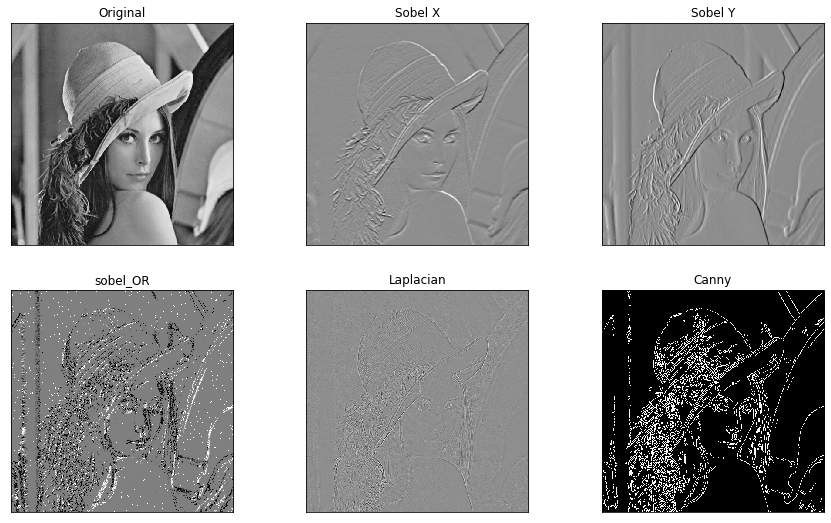

In [34]:
img2 = cv2.imread('images/lena.jpg', 0)

height, width = img2.shape

# Extract Sobel Edges - emphasize vertical or horizontal edges
sobel_x = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=5)    # 64F is equivalent of double
sobel_y = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=5)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

# Extract Laplacian Edges - gets all orientations
laplacian = cv2.Laplacian(img2, cv2.CV_64F)

# Extract Canny Edges - optimal due to low error rate, well defined edged & accurate detection
canny = cv2.Canny(img2, 50, 120)

titles = ['Original', 'Sobel X', 'Sobel Y', 'sobel_OR', 'Laplacian', 'Canny']
images = [img2, sobel_x, sobel_y, sobel_OR, laplacian, canny]

for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()
# Results are little diff. from OpenCV

In [35]:
# Canny Edge Detection Algorithm

# 1. Applies Gaussian blurring
# 2. Finds intensity gradient of the image
# 3. Apllied non-maximum suppression (i.e., removes pixels that are not edges)
# 4. Hysteresis - applies thresholds (i.e.,
#    pixel value less than threshold1 is surely not an edge
#    pixel value more than threshold2 is surely an edge
#    pixel value in-between are classified edges or non-edges based on their connectivity)

# Perpsective Transform

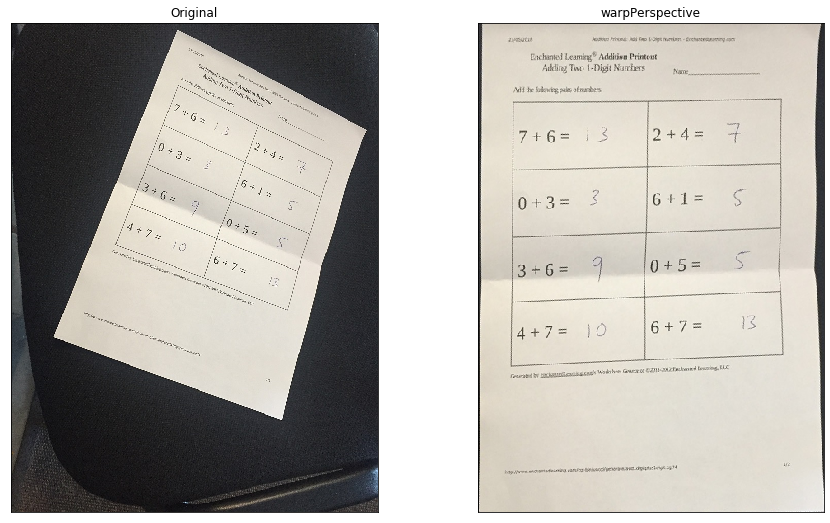

In [36]:
image = cv2.imread('images/scan.jpg')

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))

titles = ['Original', 'warpPerspective']
images = [image, warped]

for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Mouse Events

In [37]:
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,', ',y)
        strXY = str(x) + ', ' + str(y)
        cv2.putText(img, strXY, (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 0), 1)
        cv2.imshow('Image', img)
    if event == cv2.EVENT_RBUTTONDOWN:
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        strBGR = str(b) + ', ' + str(g) + ', ' + str(r)
        print(strBGR)
        cv2.putText(img, strBGR, (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 0), 1)
        cv2.imshow('Image', img)
    
img = cv2.imread('images/lena.jpg')
cv2.imshow('Image', img)

cv2.setMouseCallback('Image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

198 ,  125
129, 134, 209


# TrackBar

In [38]:
img = np.zeros([300, 512, 3], np.uint8)
cv2.namedWindow('Image')

def nothing(x):
    print(x, end=" ")
    
cv2.createTrackbar('B', 'Image', 0, 255, nothing)
cv2.createTrackbar('G', 'Image', 0, 255, nothing)
cv2.createTrackbar('R', 'Image', 0, 255, nothing)

while(True):
    cv2.imshow('Image', img)
    if cv2.waitKey(1) == 27:    # 27 refers to Esc key & if 0 is passed to waitkey, it will always wait for user response
        break
    
    b = cv2.getTrackbarPos('B', 'Image')
    g = cv2.getTrackbarPos('G', 'Image')
    r = cv2.getTrackbarPos('R', 'Image')
    img[:] = [b, g, r]
    
cv2.destroyAllWindows()

1 2 3 4 5 6 8 11 19 26 32 37 45 52 59 64 68 72 75 78 80 82 83 85 86 88 89 91 93 94 95 97 100 103 106 107 108 

# WaterMark

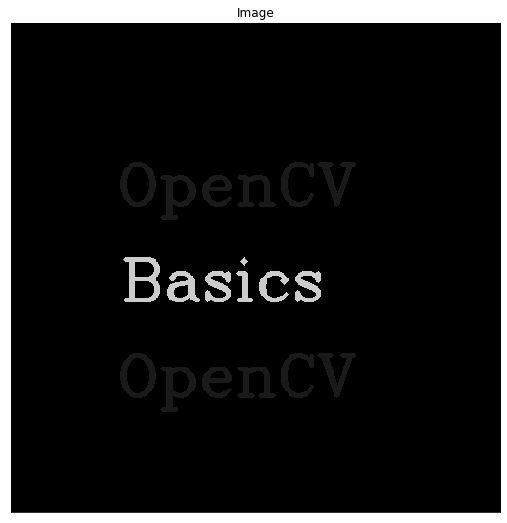

In [39]:
# Imposing one image on other
timg1 = np.zeros((512, 512), np.uint8)
cv2.putText(timg1, 'Basics', (115, 290), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3)

timg2 = np.zeros((512, 512), np.uint8)
cv2.putText(timg2, 'OpenCV', (110, 190), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3)
cv2.putText(timg2, 'OpenCV', (110, 390), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3)

image1 = cv2.resize(timg1, (512, 512))
image2 = cv2.resize(timg2, (512, 512))

# dst = cv2.add(image1, image2)
dst = cv2.addWeighted(image1, 0.8, image2, 0.1, 0)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Live-Stetch Using WebCam

In [40]:
# Our sketch generating function
def sketch(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Clean up image using Guassian Blur
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    
    # Extract edges
    canny_edges = cv2.Canny(img_gray_blur, 10, 70)
    
    # Do an invert binarize the image 
    ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask


# Initialize webcam, cap is the object of cv2.VideoCapture
cap = cv2.VideoCapture(0)    # 0 is the channel no. for camera
# If more than one camera, we can try for other channels (i.e., -1, 0 , 1, 2, ...)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width, height)

# for saving video to disk
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height), False)
# 20 is the frame rate & width-height should be int datatype & False implies no color

while cap.isOpened():
    ret, frame = cap.read()
    # ret contains a boolean indicating if it was sucessful
    # frame contains the images collected from the webcam
    
    img = sketch(frame)
    cv2.imshow('Our Live Sketcher', img)    # for displaying
    out.write(img)    # for storing frame to output file
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
cap.release()
out.release()
cv2.destroyAllWindows()      

640 480
